### 시계열 복습

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

data = pd.read_csv('data/FremontBridge.csv', index_col = 'Date', parse_dates=True)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5312\3551142071.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('data/FremontBridge.csv', index_col = 'Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [26]:
data.index

DatetimeIndex(['2019-11-01 00:00:00', '2019-11-01 01:00:00',
               '2019-11-01 02:00:00', '2019-11-01 03:00:00',
               '2019-11-01 04:00:00', '2019-11-01 05:00:00',
               '2019-11-01 06:00:00', '2019-11-01 07:00:00',
               '2019-11-01 08:00:00', '2019-11-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=147278, freq=None)

In [8]:
data.columns=['Total', 'East', 'West']

In [10]:
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Weekly bicycle count')

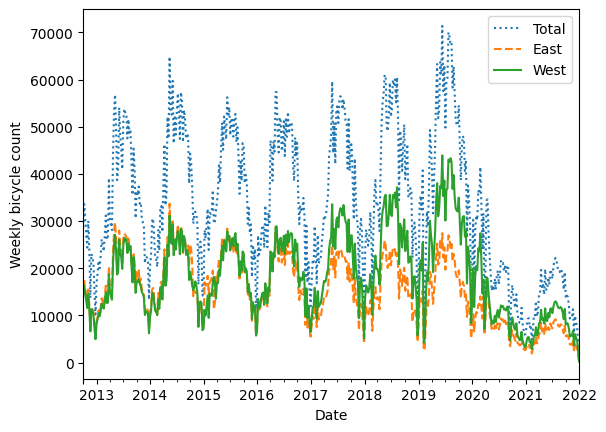

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

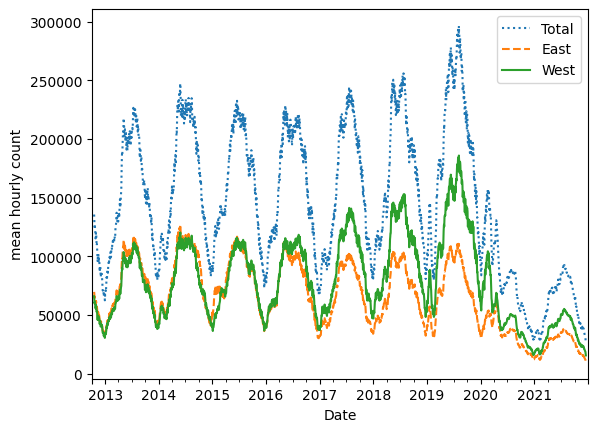

In [15]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

Text(0, 0.5, 'mean hourly count using gaussian')

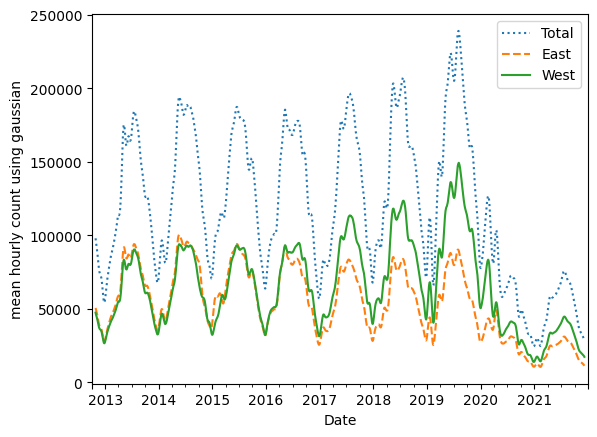

In [20]:
daily.rolling(50, center=True, win_type="gaussian").sum(std=10).plot(style=[':','--','-'])
plt.ylabel('mean hourly count using gaussian')

In [27]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

<Axes: xlabel='time'>

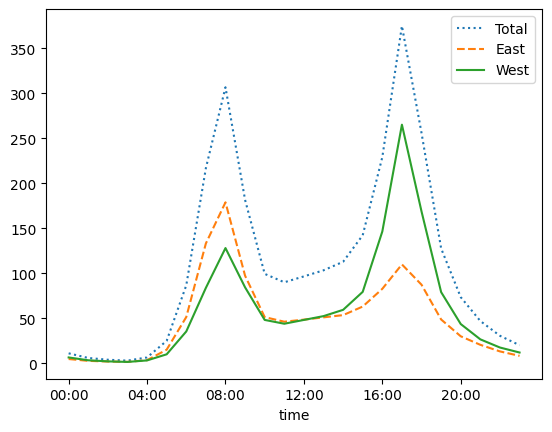

In [23]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

<Axes: >

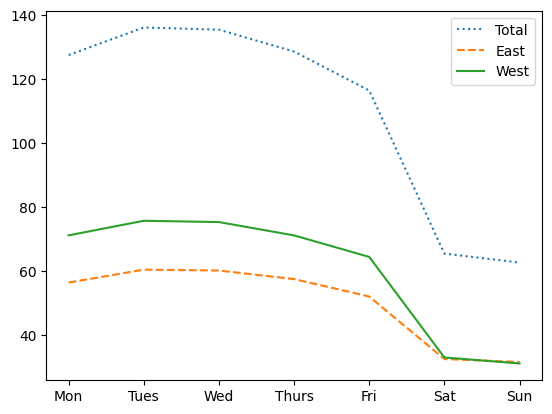

In [24]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

# Matplotlib을 활용한 시각화
+ https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show()


NameError: name 'np' is not defined

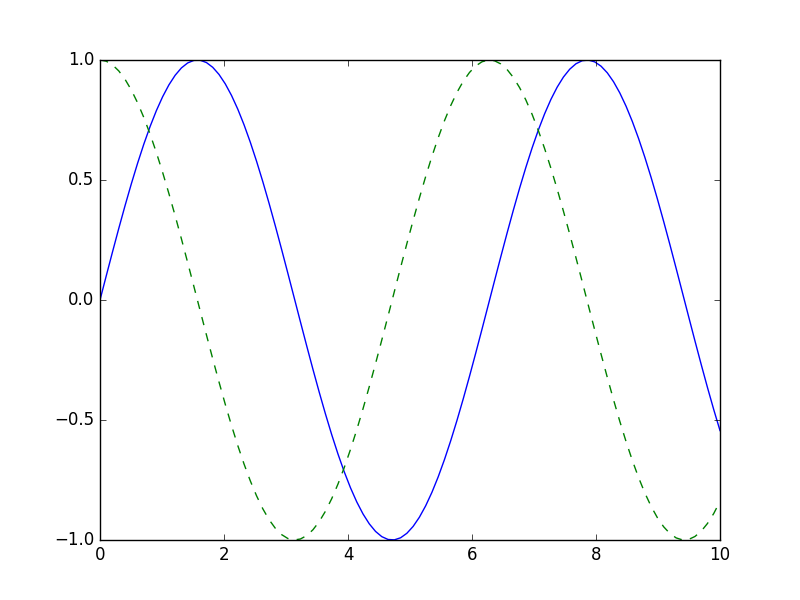

In [51]:
fig.savefig('my_figure.png')
from IPython.display import Image
Image('my_figure.png')

In [54]:
# fig.savefig()에서 호환되는 확장자
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

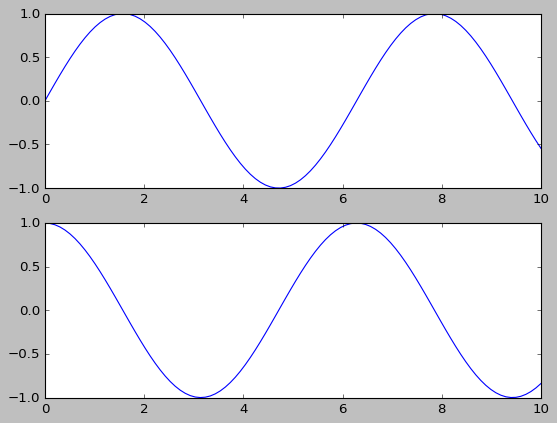

In [57]:
plt.figure()
plt.subplot(2, 1, 1)    # row , column, panel number
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

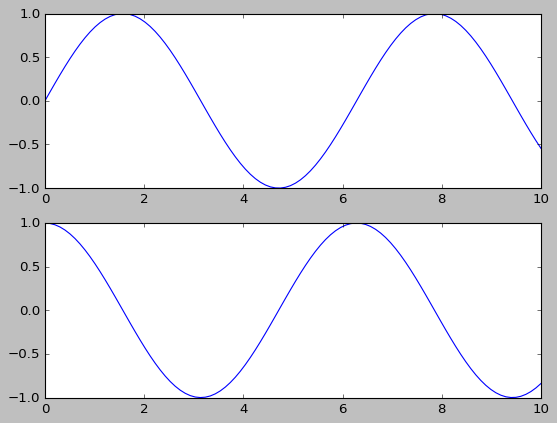

In [61]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

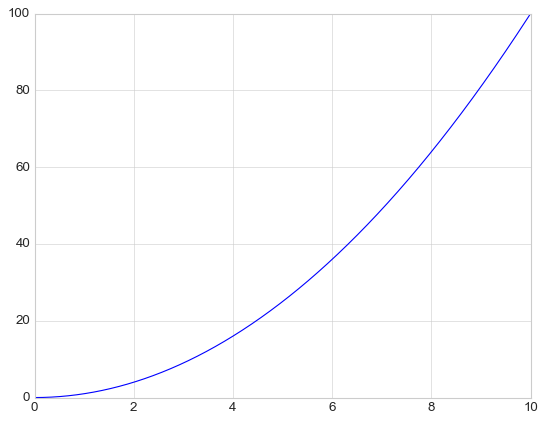

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, x**2);


C:\Users\user\AppData\Local\Temp\ipykernel_5312\357042652.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


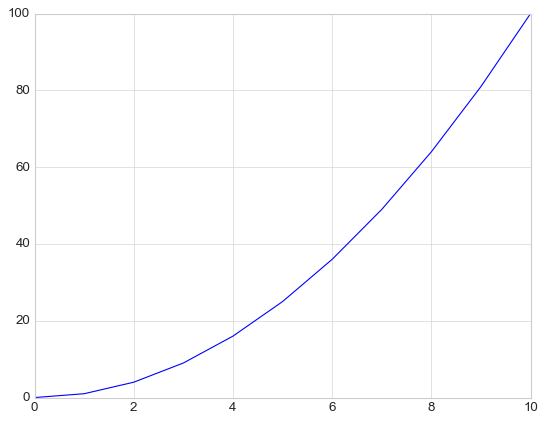

In [9]:
def my_plot():
    fig = plt.figure()
    x = np.linspace(0, 10, 11)
    y = x**2

    fig.subplots().plot(x, y)
    fig.savefig('plot1.png')
    fig.show()

my_plot()

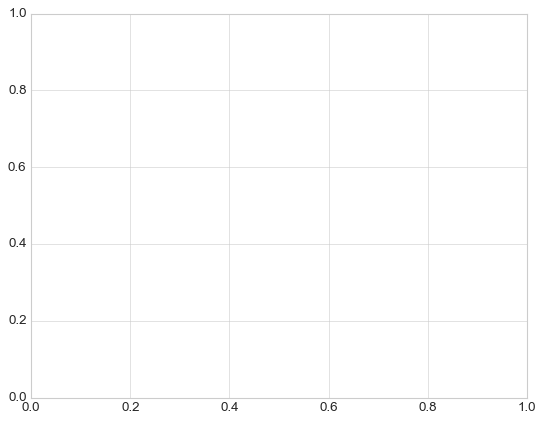

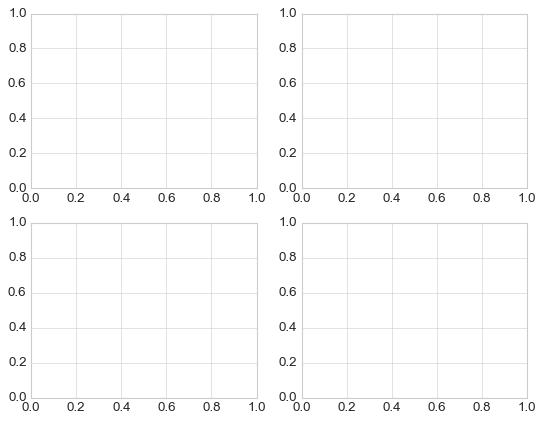

In [105]:
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [5]:
# seaborn-whitegrid 에러 수정용
# 현재 사용 가능한 style 목록
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

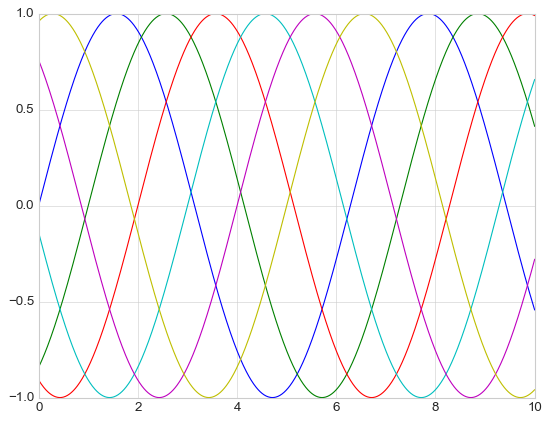

In [40]:
plt.style.use('seaborn-v0_8-whitegrid')
x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)
for i in range(6):
    plt.plot(x, np.sin(x-i))

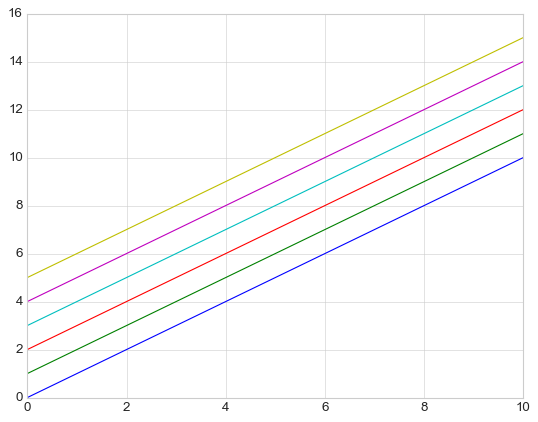

In [11]:
for i in range(6):
    plt.plot(x, x+i)

Text(0, 0.5, 'sin(x) | cos(x)')

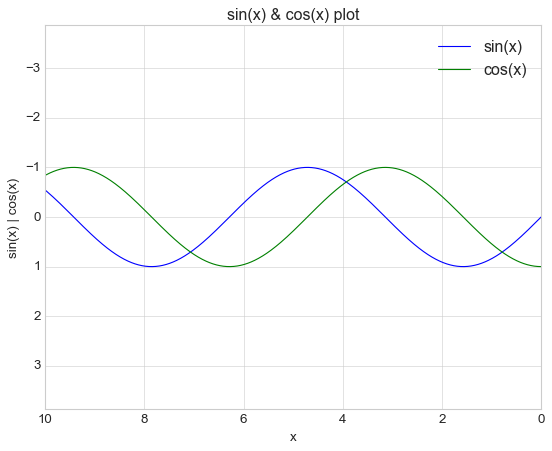

In [56]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlim(11,-1)
plt.ylim(1.5,-1.5)
plt.axis('equal')  # 가로 세로 비율을 동등하게 맞춤
plt.legend()  # label 값에 따른 범례 추가
plt.title('sin(x) & cos(x) plot');
plt.xlabel('x')
plt.ylabel('sin(x) | cos(x)')

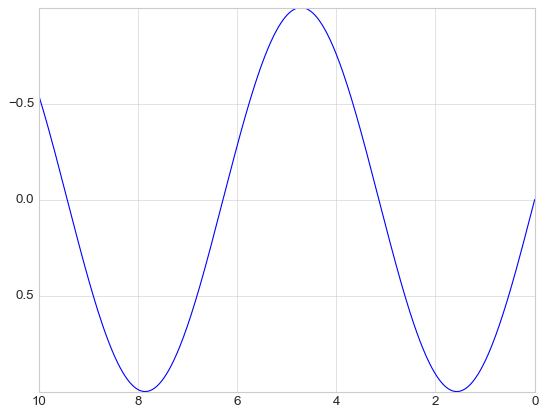

In [57]:
plt.plot(x, np.sin(x))
plt.xlim(11,-1)
plt.ylim(1.5,-1.5)
plt.axis('tight');  # 플롯 주변의 경계를 밀착시킴

### Scatter(산점도)

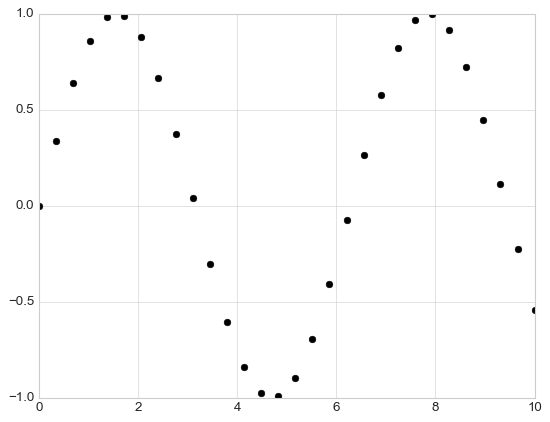

In [75]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black')

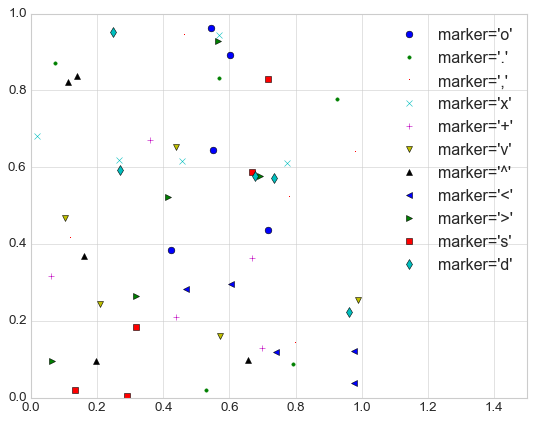

In [68]:
rng = np.random.RandomState(0)
for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0,1.5);

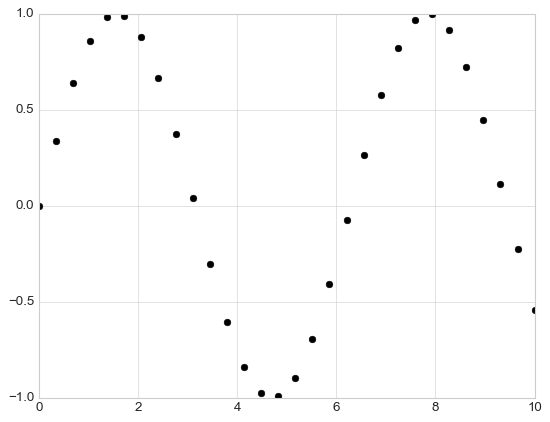

In [76]:
plt.plot(x,y,'ok') # - 선표시 / o 원표시 / k 검정색

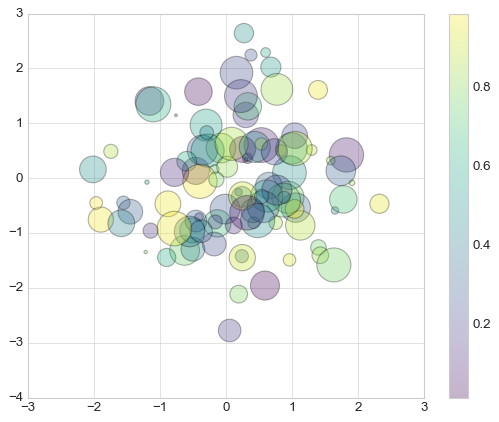

In [77]:
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000* rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() # 색상 척도 표시

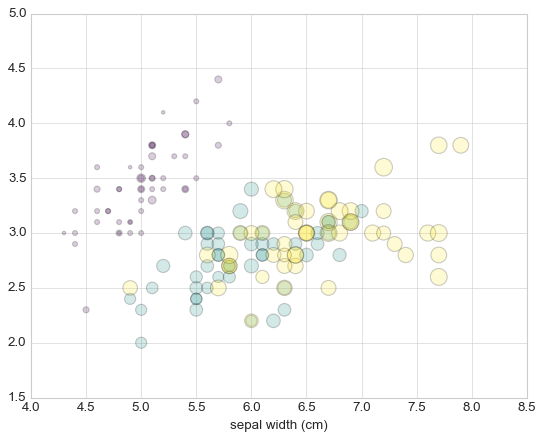

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()      # scikit learn에서 제공하는 붓꽃 데이터
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1]);

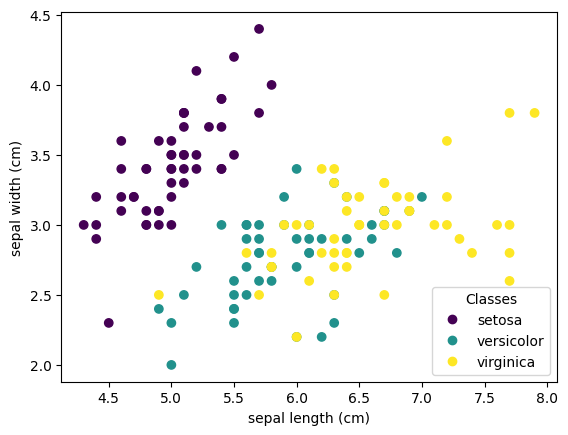

In [92]:
plt.style.use('default')
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target,cmap='viridis')
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
fig = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### 오차 시각화 하기
+ errorbar

<ErrorbarContainer object of 3 artists>

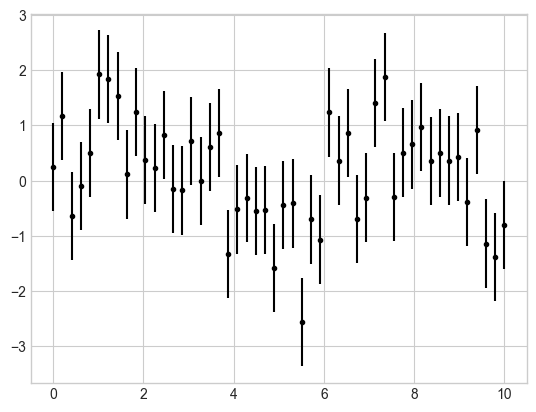

In [96]:
plt.style.use('seaborn-v0_8-whitegrid')
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

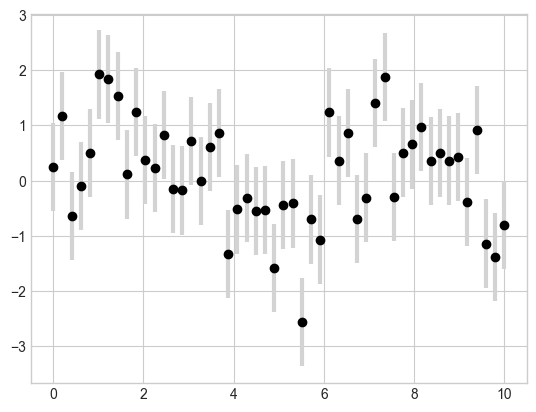

In [99]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='k', ecolor='lightgray', elinewidth=3, capsize=0)

### 3차원 함수 시각화
+ contour (등고선 플롯)

In [105]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10+y*x)* np.cos(x)
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X, Y = np.meshgrid(x, y)
Z = f (X, Y)

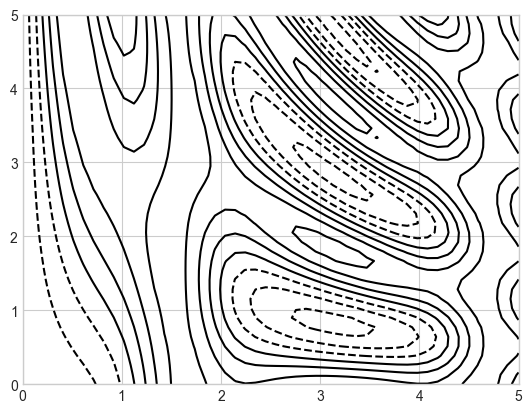

In [131]:
plt.contour(X, Y, Z, colors='k'); #음수 값은 점선, 양수 값은 실선

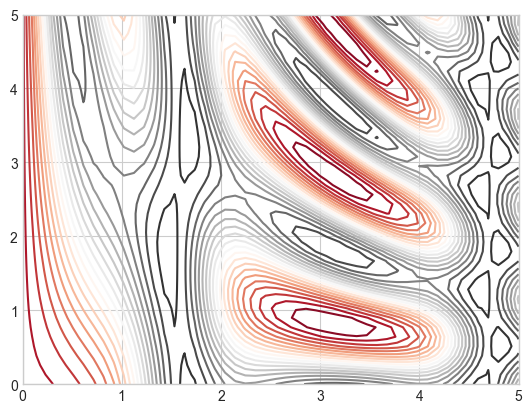

In [133]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); # 20개의 동일한 간격으로 Red-Gray 색상지도를 사용 (matlab - colormap 문서 참고)

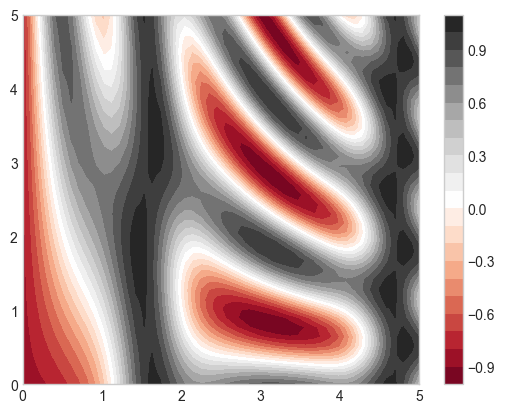

In [118]:
plt.contourf(X, Y, Z, 20, cmap='RdGy') # contour 뒤에 f를 붙이면 등고선 사이에 색을 입힘
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

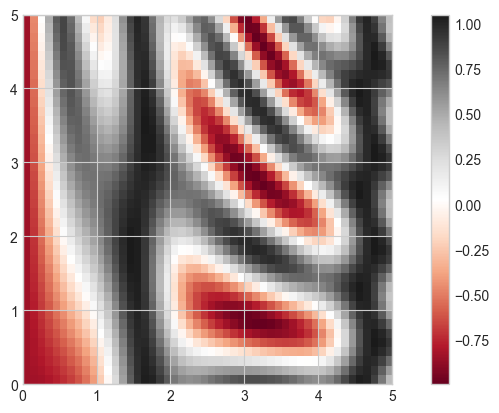

In [123]:
plt.imshow(Z, extent=[0,5,0,5], origin='lower',cmap='RdGy') # imshow는 x,y의 그리드를 받지 않으므로 extent로 x최소 최대, y최소 최대를 지정해야 함
plt.colorbar()
plt.axis('image') # 가로세로 축 비율을 조정해야 함

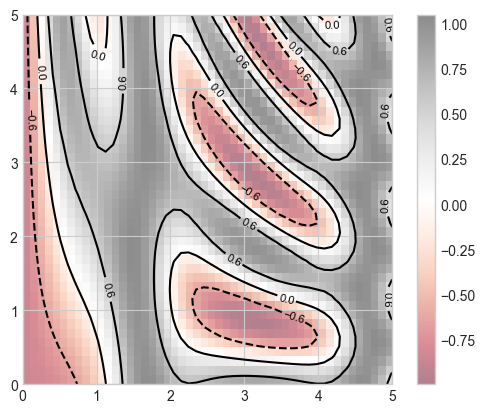

In [135]:
contours = plt.contour(X,Y,Z,3,colors='black')
plt.clabel(contours, inline=True, fontsize=8) # clabel을 통해 등고선에 값을 표시
plt.imshow(Z, extent=[0,5,0,5], origin='lower', cmap='RdGy', alpha = 0.5) # alpha값을 이용하여 백그라운드 배경으로 설정
plt.colorbar();

## 히스토그램
+ hist

(array([  3.,  17.,  66., 160., 222., 255., 172.,  75.,  22.,   8.]),
 array([-3.36903954, -2.71704724, -2.06505493, -1.41306262, -0.76107032,
        -0.10907801,  0.5429143 ,  1.1949066 ,  1.84689891,  2.49889122,
         3.15088352]),
 <BarContainer object of 10 artists>)

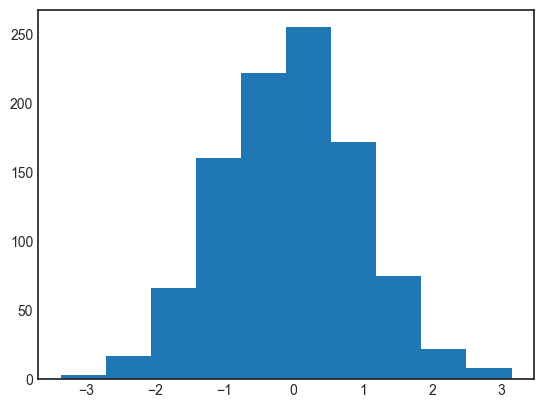

In [146]:
plt.style.use('seaborn-v0_8-white')
data = np.random.randn(1000)
plt.hist(data)

(array([0.00920256, 0.00460128, 0.        , 0.00920256, 0.04601281,
        0.02300641, 0.06441794, 0.10122819, 0.13803844, 0.1978551 ,
        0.25307047, 0.28527944, 0.28988072, 0.42791916, 0.30368456,
        0.35889994, 0.43712172, 0.37730507, 0.30368456, 0.2714756 ,
        0.21626022, 0.18405125, 0.08742434, 0.0736205 , 0.04601281,
        0.03220897, 0.02300641, 0.01840513, 0.00920256, 0.00920256]),
 array([-3.36903954, -3.15170877, -2.93437801, -2.71704724, -2.49971647,
        -2.2823857 , -2.06505493, -1.84772416, -1.63039339, -1.41306262,
        -1.19573185, -0.97840109, -0.76107032, -0.54373955, -0.32640878,
        -0.10907801,  0.10825276,  0.32558353,  0.5429143 ,  0.76024507,
         0.97757584,  1.1949066 ,  1.41223737,  1.62956814,  1.84689891,
         2.06422968,  2.28156045,  2.49889122,  2.71622199,  2.93355276,
         3.15088352]),
 [<matplotlib.patches.Polygon at 0x1dc38ceeb80>])

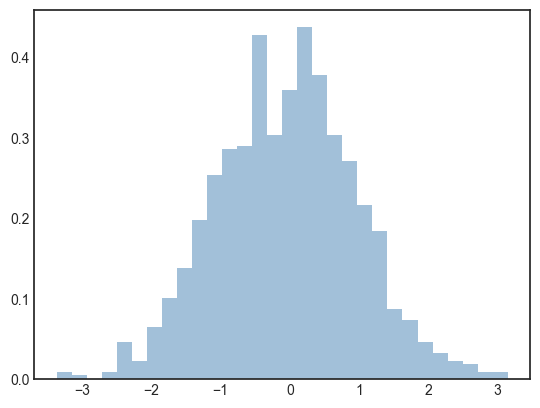

In [147]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')

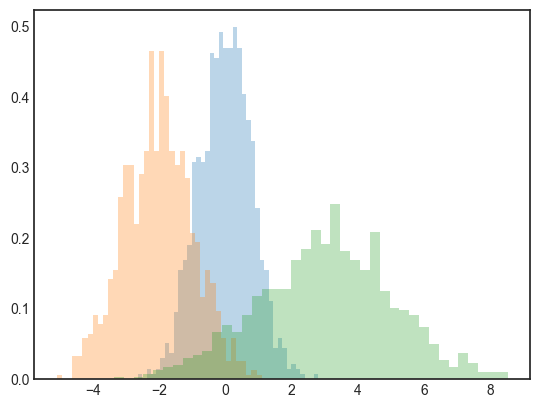

In [148]:
x1 = np.random.normal(0,0.8, 1000)
x2 = np.random.normal(-2,1, 1000)
x3 = np.random.normal(3,2, 1000)
kwargs = dict(histtype = 'stepfilled', alpha=0.3, density = True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [152]:
iris.data.shape

(150, 4)

In [154]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
iris.data[iris.target == 0].shape

(50, 4)

In [157]:
iris.data[iris.target == 1].shape

(50, 4)

In [166]:
iris.data[iris.target == 2].shape

(50, 4)

(array([ 1.,  0.,  5.,  5.,  8.,  9., 10.,  5.,  1.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 10 artists>)

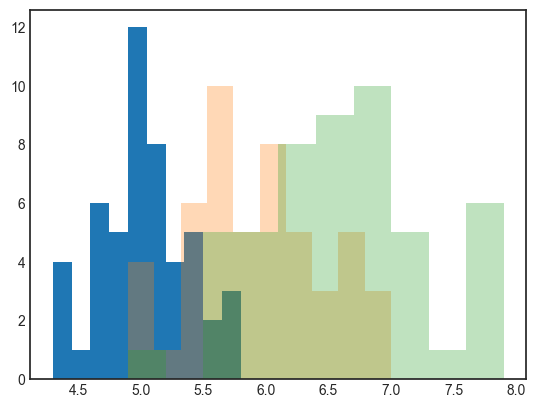

In [167]:
plt.hist(iris.data[iris.target == 0,0])
plt.hist(iris.data[iris.target == 1,0], alpha=0.3)
plt.hist(iris.data[iris.target == 2,0], alpha=0.3)

### plot 범례 설정
+ legend

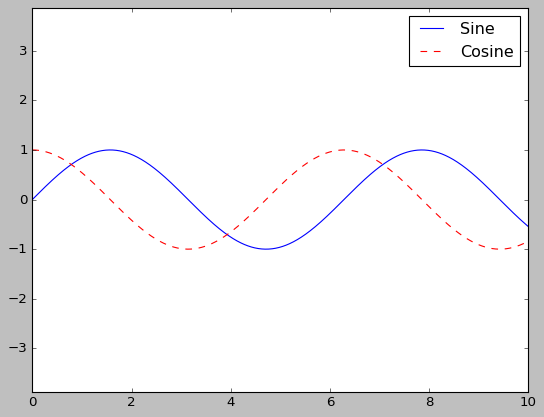

In [168]:
plt.style.use('classic')
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

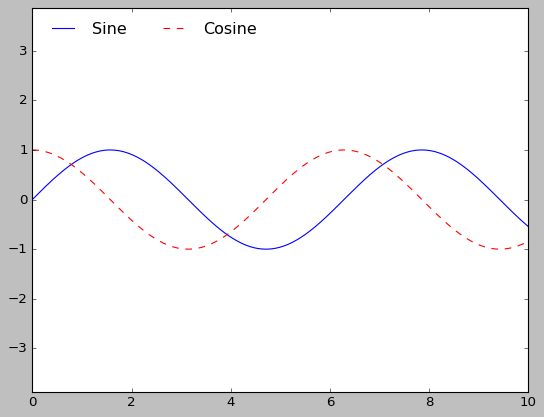

In [172]:
ax.legend(loc='upper left', frameon=False, ncol=2)
# frameon = 범례 테두리 설정 / loc = 범례 위치 설정 / ncol = 범례 열 갯수 지정
fig

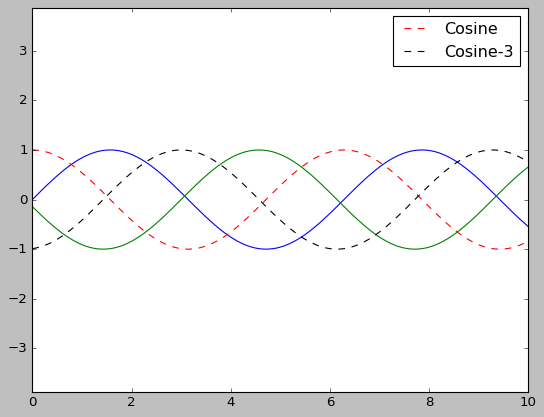

In [178]:
# 범례에 사용할 요소 선택 - label 속성을 지정하여 선택
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.plot(x, np.sin(x-3), '-g')
ax.plot(x, np.cos(x-3), '--k', label='Cosine-3')
ax.axis('equal')
ax.legend()

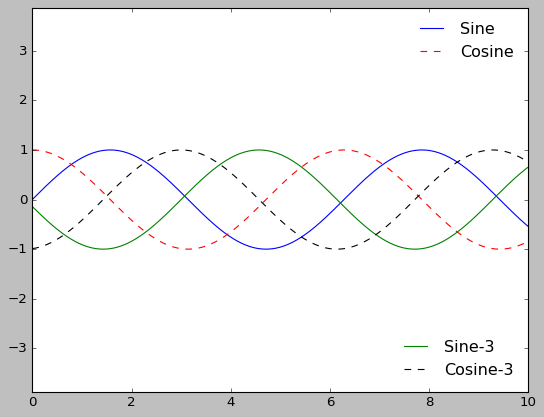

In [188]:
# 다중 범례
# import를 통해 새로운 범례를 만들고 하위 수준의 ax.add_artist로 기존 plot에 삽입
fig, ax = plt.subplots()
lines=[]
lines += ax.plot(x, np.sin(x), '-b')
lines += ax.plot(x, np.cos(x), '--r')
lines += ax.plot(x, np.sin(x-3), '-g')
lines += ax.plot(x, np.cos(x-3), '--k')
ax.axis('equal')
ax.legend(lines[:2], ['Sine','Cosine'], loc='upper right', frameon=False)
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['Sine-3','Cosine-3'], loc='lower right', frameon=False)
ax.add_artist(leg);

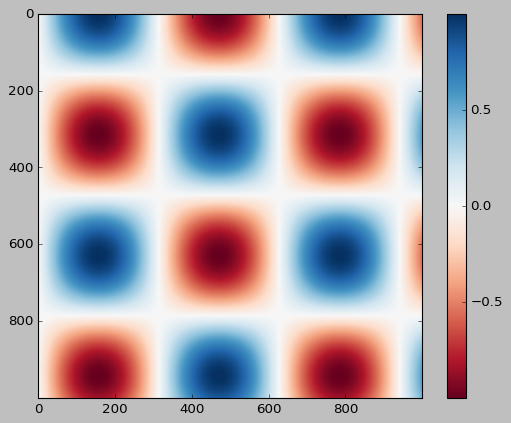

In [196]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='RdBu')
plt.colorbar();

### 예제 : 손글씨 숫자 인식 (OCR)

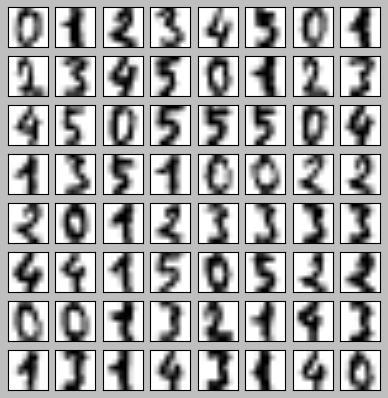

In [201]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) # 8x8 썸네일
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])
    


In [203]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


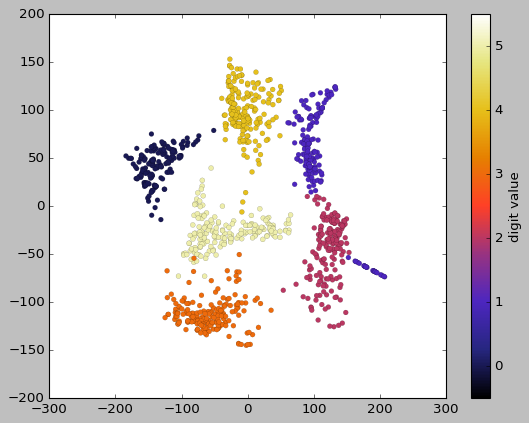

In [208]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,c=digits.target, cmap=plt.cm.CMRmap)
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)